In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
# We use PIL lib to load image from a image path to be consistent with Tensorflow tutorial. You can use Skimage instead like previous weeks.
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


cifar100 = tf.keras.datasets.cifar100 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
batch_size = 32
img_height = 32
img_width = 32
#do validation split
#The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.
normalization_layer = layers.Rescaling(1./255) #between 0 - 1
#create model
# Get the unique labels
unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)

num_classes = len(unique_labels)
base_model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, (7, 7), strides=(1, 1), padding='valid', activation='relu'), #(7x7) kernel size
    layers.AveragePooling2D((2, 2), strides=(2, 2)), # 2x2 pool size, stride 2 -> move 2 moves every window
    layers.Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu'), # Same padding -> pad in a way to keep output dim same as input dim
    layers.AveragePooling2D((2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes),
])

base_model.summary()



Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


/Users/jon/Documents/CNN_projects/tenserflow_env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 13, 13, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,684 (686.27 KB)

 Trainable params: 175,684 (686.27 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 13, 13, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,684 (686.27 KB)

 Trainable params: 175,684 (686.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 - 16s - 10ms/step - accuracy: 0.1162 - loss: 3.8560 - val_accuracy: 0.1848 - val_loss: 3.4597
Epoch 2/10
1563/1563 - 16s - 10ms/step - accuracy: 0.2245 - loss: 3.2198 - val_accuracy: 0.2483 - val_loss: 3.1141
Epoch 3/10
1563/1563 - 17s - 11ms/step - accuracy: 0.2807 - loss: 2.9272 - val_accuracy: 0.2770 - val_loss: 2.9578
Epoch 4/10
1563/1563 - 17s - 11ms/step - accuracy: 0.3190 - loss: 2.7376 - val_accuracy: 0.2968 - val_loss: 2.8699
Epoch 5/10
1563/1563 - 20s - 13ms/step - accuracy: 0.3464 - loss: 2.5940 - val_accuracy: 0.3031 - val_loss: 2.8687
Epoch 6/10
1563/1563 - 20s - 13ms/step - accuracy: 0.3740 - loss: 2.4690 - val_accuracy: 0.3138 - val_loss: 2.8186
Epoch 7/10
1563/1563 - 21s - 13ms/step - accuracy: 0.3918 - loss: 2.3693 - val_accuracy: 0.3266 - val_loss: 2.7877
Epoch 8/10
1563/1563 - 21s - 13ms/step - accuracy: 0.4118 - loss: 2.2780 - val_accuracy: 0.3284 - val_loss: 2.7954
Epoch 9/10
1563/1563 - 20s - 13ms/step - accuracy: 0.4298 - loss: 2.1971 - val_a

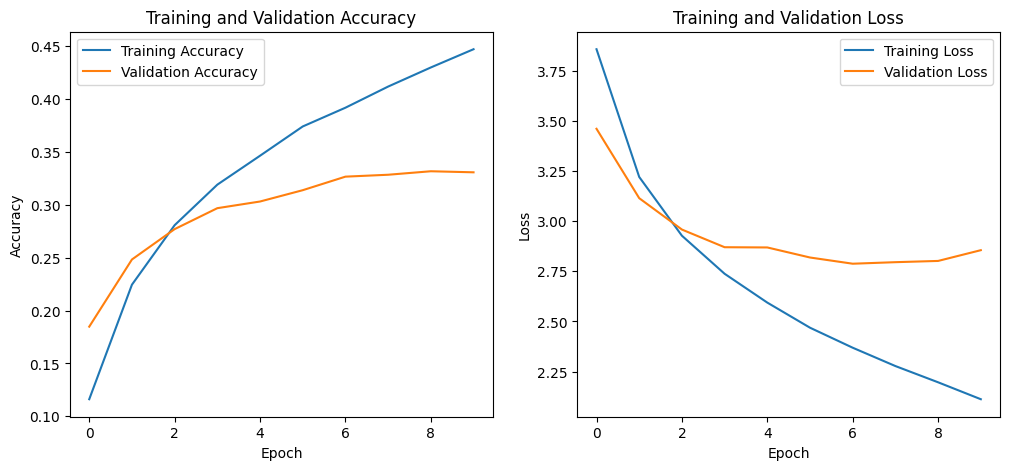

In [2]:
base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 10
history_bn_model_filter = base_model.fit(
  train_images,train_labels,
  validation_data=(test_images, test_labels),
  epochs=epochs,
  verbose=2, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)




# Evaluate the model
test_loss, test_accuracy = base_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

#accuracy is 0.59

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bn_model_filter.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn_model_filter.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bn_model_filter.history['loss'], label='Training Loss')
plt.plot(history_bn_model_filter.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()




